In [116]:
!pip3 install prettyTable

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from prettytable import PrettyTable
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import normalize
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [118]:
df = pd.read_excel("C:/Users/sunay/Downloads/DSCI552HW2/data/combined+cycle+power+plant/CCPP/Folds5x2_pp.xlsx")
df
features = list(df.columns)
response, features = features[-1], features[:-1]

# Exploring the data:
i.
How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [119]:
print("There are " + str(len(df)) + " rows in this dataset.")
print("There are " + str(len(df.columns)) +" columns in this dataset")
print("The columns represent the different features like Temperature, Ambient Pressure, Relative Humidity, and Exhuast Vaccum all used to predict energy output. The rows are the different metrics used to measure the metrics at hand.")

There are 9568 rows in this dataset.
There are 5 columns in this dataset
The columns represent the different features like Temperature, Ambient Pressure, Relative Humidity, and Exhuast Vaccum all used to predict energy output. The rows are the different metrics used to measure the metrics at hand.


ii.
Make pairwise scatterplots of all the varianbles in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

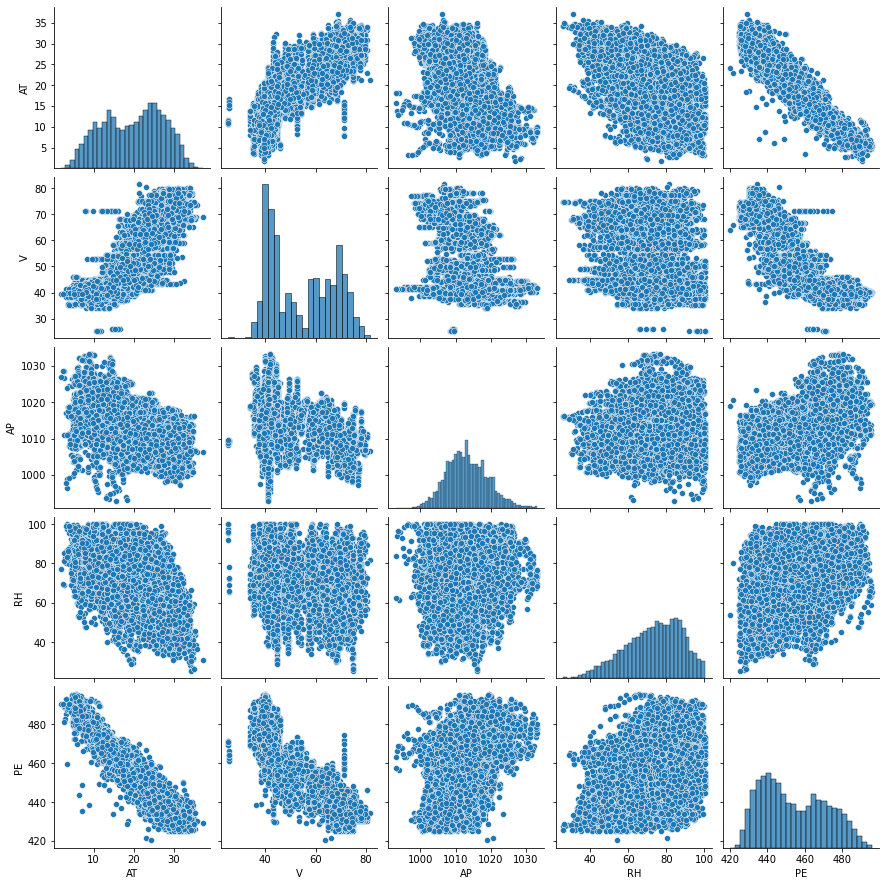

In [120]:
plot = sns.pairplot(data=df)
plot

**Findings:** Both average temperature and temperature exhaust are negatively correlated. Additionally, there seems to be some correlation between AT and V. AT and PE are negatively correlated as well as V and PE. The rest of the graphs have a fair distribution and there does not seem to be any steadfast conclusions to be made.

# 1biii.
What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table

In [121]:
myTable = PrettyTable(["Attribute", "Mean", "Median", "Range", "First quartile", "Third quartile"])
for column in df.columns:
    attribute = column
    mean = df[column].mean()
    median = df[column].median()
    rangeDf = max(df[column]) - min(df[column])
    firstQ = df[column].quantile(0.25)
    thirdQ = df[column].quantile(0.75)
    myTable.add_row([attribute, mean, median, rangeDf, firstQ, thirdQ])
myTable

Attribute,Mean,Median,Range,First quartile,Third quartile
AT,19.65123118729102,20.345,35.3,13.51,25.72
V,54.30580372073601,52.08,56.2,41.74,66.54
AP,1013.2590781772603,1012.94,40.40999999999997,1009.1,1017.26
RH,73.30897784280926,74.975,74.6,63.3275,84.83
PE,454.3650094063554,451.54999999999995,75.5,439.75,468.43


For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks

In [122]:
def fit_model(x, y, x_constant,col_name):
    model = sm.OLS(y, x_constant).fit()
    print(model.summary())
    return model

coefficients = {}
def fit_model_with_summary(column):
    y = df["PE"]
    x = df[column]
    x_constant = sm.add_constant(x, prepend=False)
    model = fit_model(x,y,x_constant,column)
    outliers_index = calculate_outliers(model)
    coefficients[column] = model.params
    fig, axes = plt.subplots(figsize=(12,7))
    axes.scatter(x,y,alpha=0.3, label="Data point")
    axes.scatter(x[outliers_index], y[outliers_index], marker="+", label="Outliers")
    axes.set_title(f"Simple Linear Regression for {column}")
    axes.set_xlabel(column)
    axes.plot(x, model.predict(x_constant), label="Regression", color="red")
    axes.set_ylabel("PE")
    axes.legend()
    plt.show()
    
def calculate_outliers(model):
    residuals = model.resid
    std_residuals = residuals / residuals.std()
    outlier_threshold = 2
    outliers = abs(std_residuals) > outlier_threshold
    return outliers

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:16   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

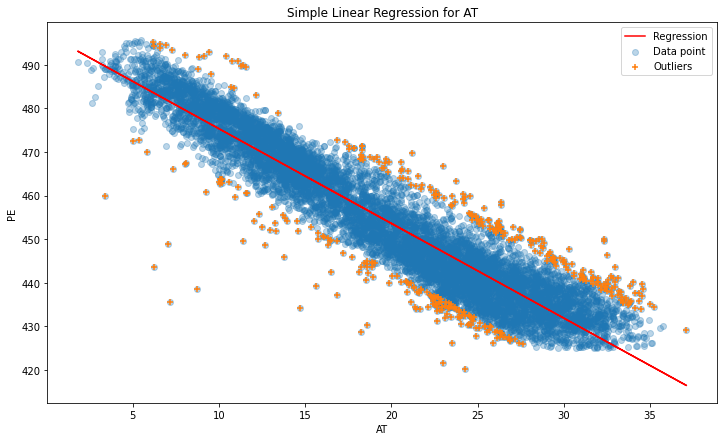

In [123]:
at_model = fit_model_with_summary("AT")

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:17   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.007   -172.402      0.0

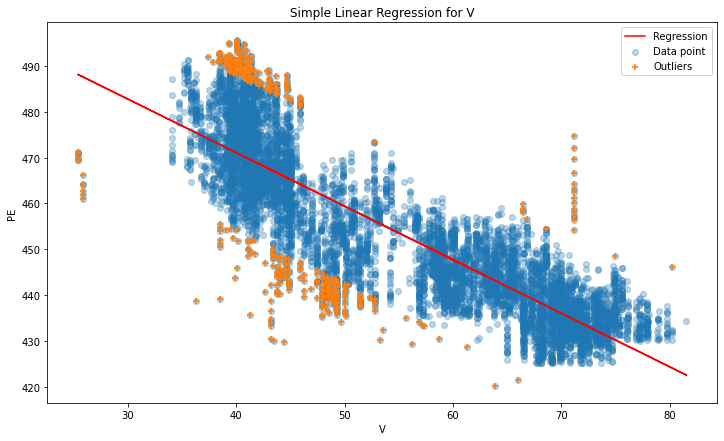

In [124]:
v_model = fit_model_with_summary("V")

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:17   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4899      0.025     59.296      0.0

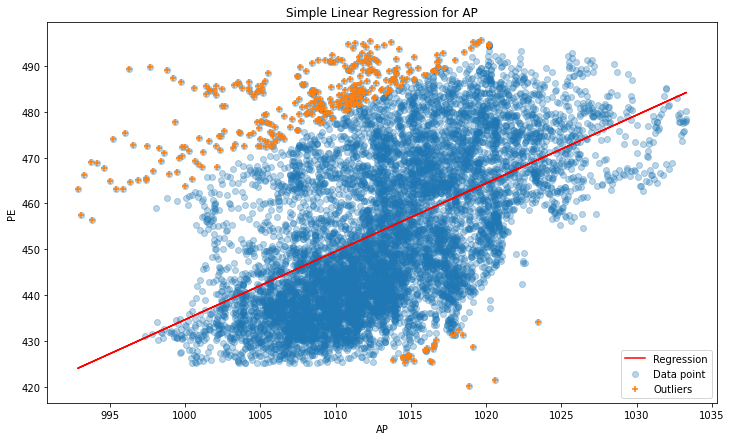

In [125]:
at_model = fit_model_with_summary("AP")

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:18   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4557      0.011     41.399      0.0

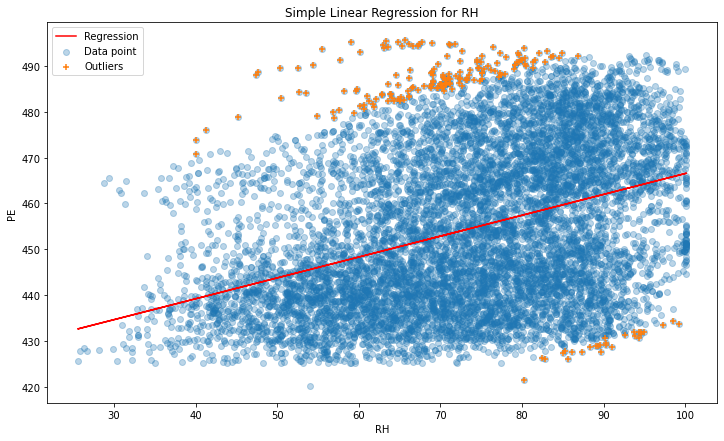

In [126]:
at_model = fit_model_with_summary("RH")

Findings: The outliers are marked in the graph as orange, which are I points I would take out if I had the opportunity to take out of the data set. There is a statistical significance between all of the variables and PE since the p-values are lower than 0.05 on the fitted model.

# 1d) Fit a multiple regression model to predict the response using all of the predictors.

In [127]:
def multiple_regressor_models():
    multiple_regression = sm.OLS(df["PE"], df.iloc[:, 0:len(df.columns)-1], prepend=False)
    multiple_regression = multiple_regression.fit()
    return multiple_regression
    
mult = multiple_regressor_models()
print(mult.summary())
print(mult)

                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.939e+07
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                        0.00
Time:                        13:44:18   Log-Likelihood:                         -29068.
No. Observations:                9568   AIC:                                  5.814e+04
Df Residuals:                    9564   BIC:                                  5.817e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [128]:
print(mult.params)

AT   -1.678056
V    -0.272647
AP    0.502796
RH   -0.099927
dtype: float64


# 1e

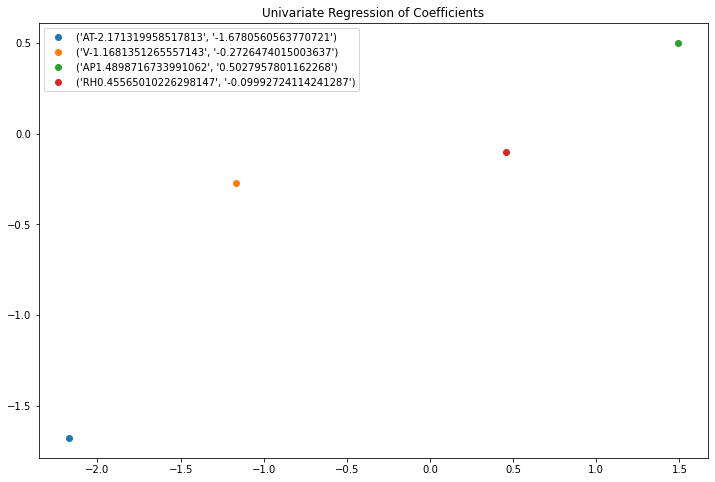

In [129]:
fig, axes = plt.subplots(figsize=(12,8))
multiple_regressors = multiple_regressor_models()
for col in df.columns:
    if col != "PE":
        axes.scatter(coefficients[col][0], multiple_regressors.params[col], label=(col+str(coefficients[col][0]), str(multiple_regressors.params[col])))
plt.title("Univariate Regression of Coefficients")
axes.legend()
plt.show()

# 1f
Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor
X, fit a model of the form
β0+β1X+β2X2+β3X3+E

In [130]:
def fit_predictor(feature):
    #poly = PolynomialFeatures(3)
    #training_data =
    #sm.OLS(df["PE"])
    X = df[feature]
    X2 = X**2
    X3 = X**3
    y = df["PE"]
    X_equation = pd.concat([X, X2, X3], axis=1)
    X_equation = sm.add_constant(X_equation)
    model = sm.OLS(y, X_equation).fit()
    summary = model.summary()
    return model

In [131]:
print("For feature AT")
model_AT = fit_predictor("AT")
print(model_AT.summary())

For feature AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:19   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    7

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [132]:
print("For feature V")
model_AT = fit_predictor("V")
print(model_AT.summary())

For feature V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:19   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     6

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [133]:
print("For feature AP")
model_AT = fit_predictor("AP")
print(model_AT.summary())

For feature AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:19   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009     

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [134]:
print("For feature RH")
model_AT = fit_predictor("RH")
print(model_AT.summary())

For feature RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:19   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     

C:\Users\sunay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Observations
The p-value for AT, AP, and RH is very small and we can reject the null hypothesis which means there is an association between the predictors and the response.
When adding a x^2 or x^3 value, the p-value does increase and there is not enough evidence to reject the null hypothesis. There is no non-linear association between the predictors and response.

# 1(g). Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant

In [135]:
features_in_interaction = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model = smf.ols(formula=features_in_interaction, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:19   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

# Observations:
Statistical significance depends on the inverse of the p-vlaue. For the different p-values are present in the output, the summarization of the results are as follows:
Considering p = 0.05, AT and AT:AP are variables that are statistically significant. AT and AT:AP have very large p-values above, 0.05 so they are not statistically significant.

# 1(h). Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [136]:
train_x, test_x, train_y, test_y = train_test_split(df[features], df[response], train_size = 0.7, random_state =42)
type(train_x)

pandas.core.frame.DataFrame

In [137]:
f = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model = smf.ols(formula = f, data = df).fit()
print(model.summary())
pred_train = model.predict(train_x)
train_mse_f = mean_squared_error(pred_train, train_y)
pred_test = model.predict(test_x)
test_mse_f = mean_squared_error(pred_test, test_y)
print(test_mse_f, train_mse_f)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:19   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7503.7323   1207.276     

**New Model Implemented:** In order to make the model better, we are dropping all the variables with a high significance p-values to make the model better and improve test error. So, we are dropping V:RH, V:AP, V**2, AT:AP, and AT:RH.

In [138]:
f2 = 'PE ~ AT + V + AP + RH + AT:V + AT:RH + I(AT**2) + I(AP**2) + I(RH**2)'
model = smf.ols(formula = f2, data = df).fit()
print(model.summary())
pred_train = model.predict(train_x)
train_mse_f2 = mean_squared_error(pred_train, train_y)
pred_test = model.predict(test_x)
test_mse_f2 = mean_squared_error(pred_test, test_y)
print(test_mse_f2, train_mse_f2)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.586e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:44:19   Log-Likelihood:                -27476.
No. Observations:                9568   AIC:                         5.497e+04
Df Residuals:                    9558   BIC:                         5.504e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.069e+04    920.573    -11.611      0.0

The p-values are now all below the threshold of 0.05 and there is statistical significance.

# 1i) KNN Regression

In [139]:
def knn_regression(train_x, train_y, test_x, test_y):    
    train_error = []
    test_error = []
    min_test_error, best_k = 10**50, -1
    for k in range(1, 101):
        
        model = KNeighborsRegressor(n_neighbors = k)
        model.fit(train_x, train_y)
        
        pred_train = model.predict(train_x)
        pred_test = model.predict(test_x)
        
        train_mse = mean_squared_error(pred_train, train_y)
        test_mse = mean_squared_error(pred_test, test_y)
        
        train_error.append(train_mse)
        test_error.append(test_mse)
        
        if (min_test_error > test_mse):
            min_test_error = test_mse 
            best_k = k
        
    return train_error, test_error, best_k, round(min_test_error, 2)

def plot_knn(axis, train_error, test_error, title):
    k = list(range(1,101))
    k = [1/x for x in k]
    axis.plot(k, train_error, label="training mse")
    axis.plot(k, test_error, label='test mse')
    axis.set_title(title)
    axis.legend()
    axis.grid()
    return axis

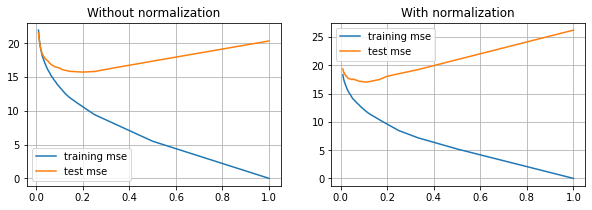

[['KNN Regression w/o normalization', 5, 15.73], ['KNN Regression with normalization', 9, 17.03]]


In [140]:
fig, axes = plt.subplots(1,2,figsize=(10,3))
train_error, test_error, best_k, min_test_error = knn_regression(train_x,train_y,test_x,test_y)
axes[0] = plot_knn(axes[0], train_error, test_error, "Without normalization")
train_x_norm = MinMaxScaler().fit_transform(train_x)
test_x_norm = MinMaxScaler().fit_transform(test_x)
train_error, test_error, best_k_norm, min_test_error_norm = knn_regression(train_x_norm,train_y,test_x_norm,test_y)
axes[1] = plot_knn(axes[1], train_error, test_error, "With normalization")
plt.show()
result = [["KNN Regression w/o normalization", best_k, min_test_error], 
         ["KNN Regression with normalization", best_k_norm, min_test_error_norm]]

print(result)

In [141]:
myTable = PrettyTable(["Method", "Train Error"])
myTable.add_row(["Linear regression with all variables", train_mse_f])
myTable.add_row(["Linear regression after removing insignicant variables", train_mse_f2])
myTable.add_row(["KNN regression w/o normalization", min_test_error]) 
myTable.add_row(["KNN regression with normalization", min_test_error_norm])
print(myTable)

+--------------------------------------------------------+-------------------+
|                         Method                         |    Train Error    |
+--------------------------------------------------------+-------------------+
|          Linear regression with all variables          | 17.90042965576714 |
| Linear regression after removing insignicant variables | 18.06790319612229 |
|            KNN regression w/o normalization            |       15.73       |
|           KNN regression with normalization            |       17.03       |
+--------------------------------------------------------+-------------------+


 The MSE of test data shows that KNN regression is a better prediction than linear regression. It consistently shows a lower training error.

# 2) ISLR: 2.4.1

1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an infexible method. Justify your answer.


**(a) The sample size n is extremely large, and the number of predictors p is small.**

Flexible methods perform better than inflexible models when n is really large. When the n is small and the p is high, it can lead to more variance for flexible models.

**(b) The number of predictors p is extremely large, and the number of observations n is small.**

Inflexible models would perform better than flexible models. The flexible models could have complex interactions and it could be a right fit when there is non-linearity between the predictors.

**(c) The relationship between the predictors and response is highly non-linear.**

Flexible methods would perform better than inflexible models. Flexible models have better reactions to more predictors in the model and quadratic functions, it would be the right fit when there is non-linearity between predictors and response.

**(d) The variance of the error terms, i.e. σ2 = Var("), is extremely high.**

The high variance in training samples can mean that data has so much noise in it. Flexible models are likely to overfit and inflexible models would perform better than flexible models.

# 3) ISLR: 2.4.7

7. The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.
Obs. X1   X2    X3    Y
1     0    3    0    Red
2    2     0    0    Red
3    0    1     3    Red
4    0     1    2   Green
5  −1     0     1   Green
6   1     1     1    Red
Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.
**(a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.**

FORMULA FOR EUCLIDEAN DISTANCE: sqrt( (X1 - 0)^2 + (X2 - 0)^2 + (X3 - 0)^2 )
sample 1 = sqrt( (0 - 0)^2 + (3 - 0)^2 + (0 - 0)^2 ) = 3
sample 2 = sqrt( (2 - 0)^2 + (0 - 0)^2 + (0 - 0)^2 ) = 2
sample 3 = sqrt( (0 - 0)^2 + (1 - 0)^2 + (3 - 0)^2 ) = 3.16
sample 4 = sqrt( (0 - 0)^2 + (1 - 0)^2 + (2 - 0)^2 ) = 2.2
sample 5 = sqrt( (1 - 0)^2 + (-1 - 0)^2 + (0 - 0)^2 ) = 1.41
sample 6 = sqrt( (1 - 0)^2 + (1 - 0)^2 + (1 - 0)^2 ) = 1.73
**(b) What is our prediction with K = 1? Why?**

When K = 1, the first neighboring point is 5. The prediction is Green.

**(c) What is our prediction with K = 3? Why?**

When K = 3, the first neighboring point is 5, 6, or 2. The prediction is Red since that is the majority label for 2 and 6.

**(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?**

The best value for K is small. When K is large, the model has high bias and less variance. There would be a lot of noise in the model as it would have to pick a feature value on many neighbors and this means the decision boundary would be linear. A model with a low K would have high variance and the model would be highly non-linear.